In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Constants
e = 1.602176634e-19                   # Elementary charge (C)
m_e = 9.10938356e-31                  # Electron mass (kg)
hbar = 1.054571817e-34                # Reduced Planck's constant (J·s)
c = 3e8                               # Speed of light

gamma_1 = 0.39 * e                    # Interlayer coupling energy (J)
gamma_0 = 3.1 * e                     # Intralayer coupling energy between A and B sites
gamma_3 = 0.315 * e
gamma_4 = 0.044 * e
delta_prime = 0.047 * e

B_const = 30                          # Constant Magnetic field (T)
E_const_1 = -100 * 1e6                   # Constant Electric Field (mV/nm) 
E_const_2 = 35 * 1e6
B_values = np.linspace(12, 18, 100)
n_values = list(range(2))

d = 3.35e-10
g = 2
a = 2.46e-10

v = (np.sqrt(3) * a * gamma_0) / (2 * hbar)     ## from T Chakraborty book
v3 = (np.sqrt(3) * a * gamma_3) / (2 * hbar)
v4 = (np.sqrt(3) * a * gamma_4) / (2 * hbar)

m_eff = gamma_1 / (2 * v**2)                    ## from T Chakraborty book
mu_B = (e * hbar) / (2 * m_eff)
# l_B = np.sqrt((hbar * c) / (e * B_const))

epsilon_0 = 8.854187817e-12
epsilon_parallel = 6.6
epsilon_perpendicular = 3

In [3]:
import scipy.integrate as integrate
import scipy.special as sp

def V_SC(q, epsilon_parallel, B, d):
    """Effective Coulomb interaction in BLG."""
    return (56.2/ epsilon_parallel) * (np.sqrt(B)) * (2 * np.pi / q) * np.tanh(q * d)  ## gives value in meV

def hankel_transform(V_SC, r, B):
    """Computes the 2D Fourier (Hankel) transform of V_SC(q)."""
    integrand = lambda q: q * V_SC(q, epsilon_parallel, B, d) * sp.j0(q * r)
    result, _ = integrate.quad(integrand, 0, np.inf, limit=100)
    return result * 1e-3 * e

In [4]:
# Compute V(r) at r = 0 and r = a/3
r_A2 = a / np.sqrt(3)
r_B2 = 0

# V_A2_const = hankel_transform(V_SC, r_A2, B_const)
# V_B2_const = hankel_transform(V_SC, r_B2, B_const)

In [5]:
# Store eigenvalues for all n
all_eigenvalues_ZS_EF_K_var_B_1 = np.zeros((len(n_values), len(B_values), 4))
all_eigenvalues_ZS_EF_K_var_B_2 = np.zeros((len(n_values), len(B_values), 4))

all_eigenvalues_ZS_EF_K_prime_var_B_1 = np.zeros((len(n_values), len(B_values), 4))
all_eigenvalues_ZS_EF_K_prime_var_B_2 = np.zeros((len(n_values), len(B_values), 4))

In [6]:
def hamiltonian_matrix_ZS_EF_K_var_B(n, omega_B, delta_ZS, V_A2, V_B2, l_B):
    sqrt_n_plus_3 = np.sqrt(n + 3)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n = np.sqrt(n)
    potential_diff_const_1 = e * E_const_1 * (d / 2)
    potential_diff_const_2 = e * E_const_2 * (d / 2)
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H_ZS_EF_K_var_B_1 = np.array([
        [delta_ZS + potential_diff_const_1, hbar_omega_B_n_plus_1, - hbar * (np.sqrt(2) * sqrt_n_plus_1 * v4 / l_B),  hbar * (np.sqrt(2) * sqrt_n_plus_3 * v3 / l_B)],
        [hbar_omega_B_n_plus_1, delta_prime + delta_ZS + potential_diff_const_1, gamma_1, - hbar * (np.sqrt(2) * sqrt_n_plus_2 * v4 / l_B)],
        [- hbar * (np.sqrt(2) * sqrt_n_plus_1 * v4 / l_B), gamma_1, V_A2 + delta_prime + delta_ZS - potential_diff_const_1, hbar_omega_B_n_plus_2],
        [hbar * (np.sqrt(2) * sqrt_n * v3 / l_B), - hbar * (np.sqrt(2) * sqrt_n_plus_2 * v4 / l_B), hbar_omega_B_n_plus_2, V_B2 + delta_ZS - potential_diff_const_1]
    ])

    H_ZS_EF_K_var_B_2 = np.array([
        [delta_ZS + potential_diff_const_2, hbar_omega_B_n_plus_1, - hbar * (np.sqrt(2) * sqrt_n_plus_1 * v4 / l_B),  hbar * (np.sqrt(2) * sqrt_n_plus_3 * v3 / l_B)],
        [hbar_omega_B_n_plus_1, delta_prime + delta_ZS + potential_diff_const_2, gamma_1, - hbar * (np.sqrt(2) * sqrt_n_plus_2 * v4 / l_B)],
        [- hbar * (np.sqrt(2) * sqrt_n_plus_1 * v4 / l_B), gamma_1, V_A2 + delta_prime + delta_ZS - potential_diff_const_2, hbar_omega_B_n_plus_2],
        [hbar * (np.sqrt(2) * sqrt_n * v3 / l_B), - hbar * (np.sqrt(2) * sqrt_n_plus_2 * v4 / l_B), hbar_omega_B_n_plus_2, V_B2 + delta_ZS - potential_diff_const_2]
    ])
    return H_ZS_EF_K_var_B_1 , H_ZS_EF_K_var_B_2

In [7]:
def hamiltonian_matrix_ZS_EF_K_prime_var_B(n, omega_B, delta_ZS, V_A2, V_B2, l_B):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_3 = np.sqrt(n + 3)
    potential_diff_const_1 = e * E_const_1 * (d / 2)
    potential_diff_const_2 = e * E_const_2 * (d / 2)
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_3 = hbar * omega_B * sqrt_n_plus_3
    
    H_ZS_EF_K_prime_var_B_1 = np.array([
        [delta_ZS + potential_diff_const_1, hbar_omega_B_n_plus_2, - hbar * (np.sqrt(2) * sqrt_n_plus_2 * v4 / l_B), hbar * (np.sqrt(2) * sqrt_n_plus_2 * v3 / l_B)],
        [hbar_omega_B_n, delta_prime + delta_ZS + potential_diff_const_1, gamma_1, - hbar * (np.sqrt(2) * sqrt_n_plus_3 * v4 / l_B)],
        [- hbar * (np.sqrt(2) * sqrt_n * v4 / l_B), gamma_1, V_A2 + delta_prime + delta_ZS - potential_diff_const_1, hbar_omega_B_n_plus_3],
        [hbar * (np.sqrt(2) * sqrt_n_plus_1 * v3 / l_B), - hbar * (np.sqrt(2) * sqrt_n_plus_1 * v4 / l_B), hbar_omega_B_n_plus_1, V_B2 + delta_ZS - potential_diff_const_1]
    ])

    H_ZS_EF_K_prime_var_B_2 = np.array([
        [delta_ZS + potential_diff_const_2, hbar_omega_B_n_plus_2, - hbar * (np.sqrt(2) * sqrt_n_plus_2 * v4 / l_B), hbar * (np.sqrt(2) * sqrt_n_plus_2 * v3 / l_B)],
        [hbar_omega_B_n, delta_prime + delta_ZS + potential_diff_const_2, gamma_1, - hbar * (np.sqrt(2) * sqrt_n_plus_3 * v4 / l_B)],
        [- hbar * (np.sqrt(2) * sqrt_n * v4 / l_B), gamma_1, V_A2 + delta_prime + delta_ZS - potential_diff_const_2, hbar_omega_B_n_plus_3],
        [hbar * (np.sqrt(2) * sqrt_n_plus_1 * v3 / l_B), - hbar * (np.sqrt(2) * sqrt_n_plus_1 * v4 / l_B), hbar_omega_B_n_plus_1, V_B2 + delta_ZS - potential_diff_const_2]
    ])
    
    return H_ZS_EF_K_prime_var_B_1, H_ZS_EF_K_prime_var_B_2

In [8]:
# Compute eigenvalues
for i, n in enumerate(n_values):
    for j, B in enumerate(B_values):
        omega_B = e * B / m_eff
        delta_ZS = g * mu_B * B
        V_A2 = hankel_transform(V_SC, r_A2, B)
        V_B2 = hankel_transform(V_SC, r_B2, B)
        l_B = np.sqrt((hbar * c)/(e * B))
        H_ZS_EF_K_var_B = hamiltonian_matrix_ZS_EF_K_var_B(n, omega_B, delta_ZS, V_A2, V_B2, l_B)
        H_ZS_EF_K_prime_var_B = hamiltonian_matrix_ZS_EF_K_prime_var_B(n, omega_B, delta_ZS, V_A2, V_B2, l_B)
        
        eigvals_ZS_EF_K_var_B_1 = np.linalg.eigvalsh(H_ZS_EF_K_var_B)[0] / e  # Convert to eV
        eigvals_ZS_EF_K_var_B_2 = np.linalg.eigvalsh(H_ZS_EF_K_var_B)[1] / e  # Convert to eV
        
        eigvals_ZS_EF_K_prime_var_B_1 = np.linalg.eigvalsh(H_ZS_EF_K_prime_var_B)[0] / e  # Convert to eV
        eigvals_ZS_EF_K_prime_var_B_2 = np.linalg.eigvalsh(H_ZS_EF_K_prime_var_B)[1] / e  # Convert to eV
        
        all_eigenvalues_ZS_EF_K_var_B_1[i, j, :] = eigvals_ZS_EF_K_var_B_1
        all_eigenvalues_ZS_EF_K_var_B_2[i, j, :] = eigvals_ZS_EF_K_var_B_2
        
        all_eigenvalues_ZS_EF_K_prime_var_B_1[i, j, :] = eigvals_ZS_EF_K_prime_var_B_1
        all_eigenvalues_ZS_EF_K_prime_var_B_2[i, j, :] = eigvals_ZS_EF_K_prime_var_B_2

<ipython-input-3-95687ab231f9>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = integrate.quad(integrand, 0, np.inf, limit=100)


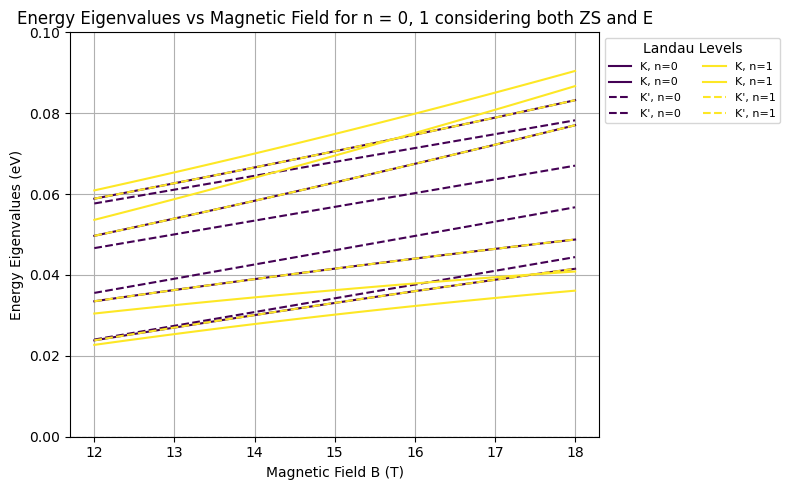

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))  # Color map for better visualization

for i, n in enumerate(n_values):
    for mode in range(4):  # There are 4 eigenvalues per n
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_var_B_1[i, :, mode], color=colors[i], linestyle='-', label=f'K, n={n}' if mode == 0 else "")
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_var_B_2[i, :, mode], color=colors[i], linestyle='-', label=f'K, n={n}' if mode == 0 else "")
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_prime_var_B_1[i, :, mode], color=colors[i], linestyle='--', label=f"K', n={n}" if mode == 0 else "")
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_prime_var_B_2[i, :, mode], color=colors[i], linestyle='--', label=f"K', n={n}" if mode == 0 else "")

ax.set_xlabel('Magnetic Field B (T)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_ylim(0, 0.1)
ax.set_title('Energy Eigenvalues vs Magnetic Field for n = 0, 1 considering both ZS and E')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')  # Show zero energy level
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize=8, title="Landau Levels")
ax.grid()

plt.tight_layout()

# Save the figure
# plt.savefig("energy_vs_B_considering_both_ZS_and_E.pdf", dpi=300, bbox_inches="tight")  # Saves as Pdf

plt.show()

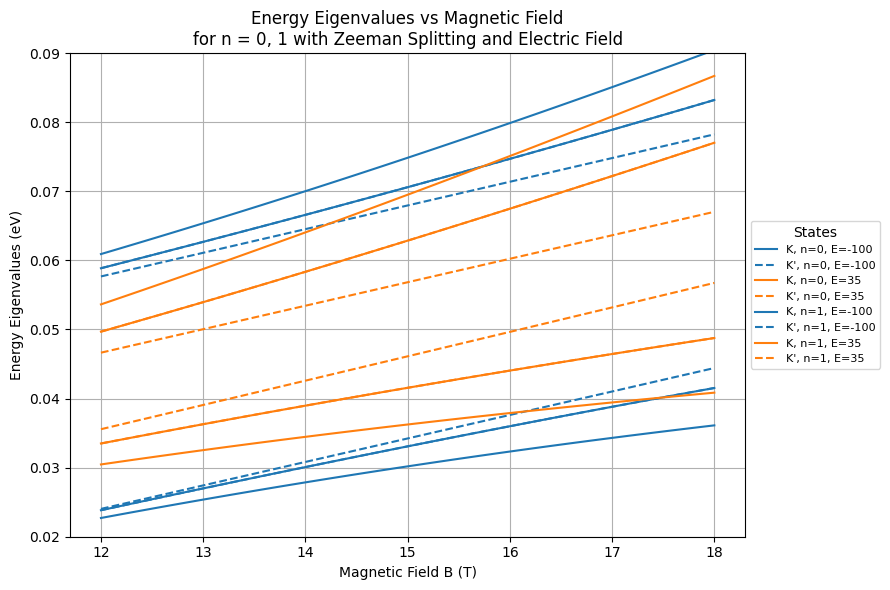

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['tab:blue', 'tab:orange']  # E1 (-100 mV/nm) and E2 (35 mV/nm)
linestyles = ['-', '--']  # Solid for K, dashed for K'
n_values = [0, 1]

for i, n in enumerate(n_values):
    for mode in range(4):
        # E = -100 mV/nm
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_var_B_1[i, :, mode], color=colors[0], linestyle=linestyles[0],
                label=f'K, n={n}, E=-100' if mode == 0 else "")
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_prime_var_B_1[i, :, mode], color=colors[0], linestyle=linestyles[1],
                label=f"K', n={n}, E=-100" if mode == 0 else "")
        # E = 35 mV/nm
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_var_B_2[i, :, mode], color=colors[1], linestyle=linestyles[0],
                label=f'K, n={n}, E=35' if mode == 0 else "")
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_prime_var_B_2[i, :, mode], color=colors[1], linestyle=linestyles[1],
                label=f"K', n={n}, E=35" if mode == 0 else "")

ax.set_xlabel('Magnetic Field B (T)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_ylim(0.02, 0.09)
ax.set_title('Energy Eigenvalues vs Magnetic Field\nfor n = 0, 1 with Zeeman Splitting and Electric Field')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')

# Legend on the right side for clarity
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, title="States")
ax.grid()

plt.tight_layout()
fig.subplots_adjust(right=0.75)  # Make space for the legend
plt.savefig("energy_vs_B_considering_both_ZS_and_E_plot1.pdf", dpi=300, bbox_inches="tight")
plt.show()


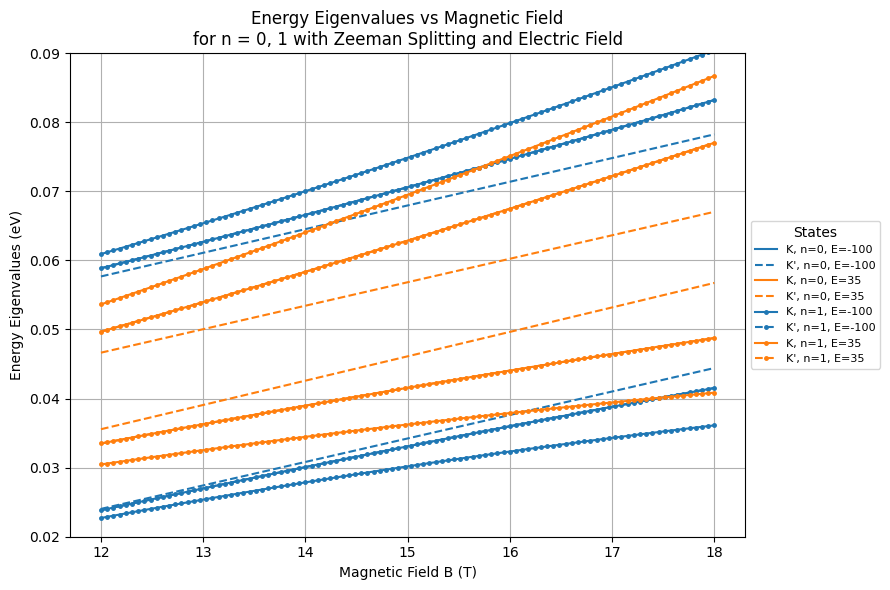

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['tab:blue', 'tab:orange']  # E1 (-100 mV/nm) and E2 (35 mV/nm)
linestyles = ['-', '--']  # Solid for K, dashed for K'
n_values = [0, 1]

for i, n in enumerate(n_values):
    # Marker logic: dot for n=1, none for n=0
    marker = '.' if n == 1 else None
    markersize = 5 if n == 1 else 0

    for mode in range(4):
        # E = -100 mV/nm
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_var_B_1[i, :, mode],
                color=colors[0], linestyle=linestyles[0], marker=marker, markersize=markersize,
                label=f'K, n={n}, E=-100' if mode == 0 else "")
        
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_prime_var_B_1[i, :, mode],
                color=colors[0], linestyle=linestyles[1], marker=marker, markersize=markersize,
                label=f"K', n={n}, E=-100" if mode == 0 else "")
        
        # E = 35 mV/nm
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_var_B_2[i, :, mode],
                color=colors[1], linestyle=linestyles[0], marker=marker, markersize=markersize,
                label=f'K, n={n}, E=35' if mode == 0 else "")
        
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_prime_var_B_2[i, :, mode],
                color=colors[1], linestyle=linestyles[1], marker=marker, markersize=markersize,
                label=f"K', n={n}, E=35" if mode == 0 else "")

# Axis settings
ax.set_xlabel('Magnetic Field B (T)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_ylim(0.02, 0.09)
ax.set_title('Energy Eigenvalues vs Magnetic Field\nfor n = 0, 1 with Zeeman Splitting and Electric Field')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')
ax.grid()

# Legend on the right side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, title="States")

plt.tight_layout()
fig.subplots_adjust(right=0.75)  # Adjust space for legend
plt.savefig("energy_vs_B_considering_both_ZS_and_E_plot2.pdf", dpi=300, bbox_inches="tight")
plt.show()